In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/tdi_data/'
df=pd.read_csv(path+'p1_bpm_cal.csv')
#df=df[df['bpm']>60]
#df=df[df['bpm']<100]
df.head()

,dateTime,bpm,calories
0,2019-11-01 00:00:00,54,1.39
1,2019-11-01 00:01:00,53,1.39
2,2019-11-01 00:02:00,50,1.39
3,2019-11-01 00:03:00,52,1.39
4,2019-11-01 00:04:00,53,1.39


In [ ]:
train_size=len(df)-10000
print(train_size)
total_data=df.iloc[:,1:3].values
#total_data[:-1,1]=total_data[1:,1]
train_set=total_data[:train_size,:]
test_set=total_data[train_size:,:]

198830


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_set)

print(train_set_scaled.shape)

window_size=60

from keras.preprocessing.sequence import TimeseriesGenerator

series=TimeseriesGenerator(train_set_scaled, train_set_scaled[:,0].reshape(-1,1), length=window_size, batch_size=train_size)

x_train, y_train = series[0]

print(x_train.shape, y_train.shape)

(198830, 2)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
scy = MinMaxScaler(feature_range = (0, 1))

from keras.preprocessing.sequence import TimeseriesGenerator

window_size=60
series=TimeseriesGenerator(train_set, train_set[:,0].reshape(-1,1), length=window_size, batch_size=train_size)

x_train, y_train = series[0]

for i in range(x_train.shape[0]):
  x_train[i]=sc.fit_transform(x_train[i])

y_train=scy.fit_transform(y_train)
print(x_train.shape, y_train.shape)


(198770, 60, 2) (198770, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

nn = Sequential()

nn.add(LSTM(units = 50, return_sequences = True, input_shape=(x_train.shape[1], x_train.shape[2])))
nn.add(Dropout(0.2))

nn.add(LSTM(units = 50, return_sequences = True))
nn.add(Dropout(0.2))

nn.add(LSTM(units = 50, return_sequences = True))
nn.add(Dropout(0.2))

nn.add(LSTM(units = 50))
nn.add(Dropout(0.2))

nn.add(Dense(units = 1, activation='relu'))

nn.compile(optimizer = 'adam', loss = 'mean_squared_error')

nn.fit(x_train, y_train, epochs = 15, batch_size = 512, shuffle=False)

Epoch 1/15
389/389 [==============================] - 31s 62ms/step - loss: 0.0099
Epoch 2/15
389/389 [==============================] - 24s 61ms/step - loss: 0.0064
Epoch 3/15
389/389 [==============================] - 24s 61ms/step - loss: 0.0055
Epoch 4/15
389/389 [==============================] - 24s 61ms/step - loss: 0.0050
Epoch 5/15
389/389 [==============================] - 24s 61ms/step - loss: 0.0046
Epoch 6/15
389/389 [==============================] - 24s 61ms/step - loss: 0.0044
Epoch 7/15
389/389 [==============================] - 24s 61ms/step - loss: 0.0043
Epoch 8/15
389/389 [==============================] - 24s 62ms/step - loss: 0.0042
Epoch 9/15
389/389 [==============================] - 24s 62ms/step - loss: 0.0041
Epoch 10/15
389/389 [==============================] - 24s 62ms/step - loss: 0.0040
Epoch 11/15
389/389 [==============================] - 24s 62ms/step - loss: 0.0039
Epoch 12/15
389/389 [==============================] - 24s 62ms/step - loss: 0.0039
E

In [ ]:
test_set_scaled = sc.transform(test_set)

test_size=df.shape[0]-train_size

series_test=TimeseriesGenerator(test_set_scaled, test_set_scaled[:,0].reshape(-1,1), length=window_size, batch_size=test_size)

x_test, y_test = series_test[0]

print(x_test.shape, y_test.shape)

(9940, 60, 2) (9940, 1)


In [ ]:
test_size=df.shape[0]-train_size
series_test=TimeseriesGenerator(test_set, test_set[:,0].reshape(-1,1), length=window_size, batch_size=test_size)
x_test, y_test = series_test[0]

for i in range(x_test.shape[0]):
  x_test[i]=sc.fit_transform(x_test[i])

#y_test=scy.fit_transform(y_test)

print(x_test.shape, y_test.shape)

(9940, 60, 2) (9940, 1)


In [ ]:
predicted_hr = nn.predict(x_test)
print(predicted_hr.shape)
predicted_hr=np.append(predicted_hr, np.zeros(predicted_hr.shape[0]).reshape(predicted_hr.shape[0],1), axis=1)
predicted_hr = scy.inverse_transform(predicted_hr)

(9940, 1)


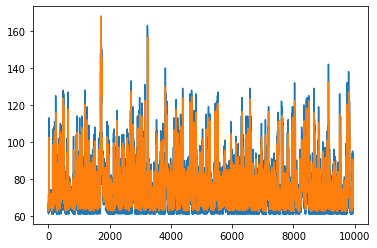

In [ ]:
plt.plot(test_set[window_size:,0])
plt.plot(predicted_hr[:,0])
plt.show()

In [ ]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()

time=np.arange(predicted_hr.shape[0])

p=figure(plot_width=800, plot_height=400)

p.line(time, test_set[window_size:,0], legend_label='actual')
p.line(time, predicted_hr[:,0], color='red', legend_label='predicted')
p.legend.click_policy='hide'

show(p)

In [ ]:
data=[[i,i] for i in range(10)]
t=[[i] for i in range(10)]
s=TimeseriesGenerator(data, t, length=3)

print(s[0])

(array([[[0, 0],
        [1, 1],
        [2, 2]],

       [[1, 1],
        [2, 2],
        [3, 3]],

       [[2, 2],
        [3, 3],
        [4, 4]],

       [[3, 3],
        [4, 4],
        [5, 5]],

       [[4, 4],
        [5, 5],
        [6, 6]],

       [[5, 5],
        [6, 6],
        [7, 7]],

       [[6, 6],
        [7, 7],
        [8, 8]]]), array([[3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]]))


In [ ]:
test_set.shape

(8830, 2)

In [ ]:
test_hr=np.append(y_test, np.zeros(y_test.shape[0]).reshape(y_test.shape[0],1), axis=1)
test_hr = sc.inverse_transform(test_hr)

print(test_set[window_size:10+window_size,0], test_hr[:10,0])

[73. 69. 70. 74. 69. 60. 57. 60. 68. 65.] [73. 69. 70. 74. 69. 60. 57. 60. 68. 65.]


In [ ]:
print(total_data[995:1000,:])

[[70.    4.45]
 [73.    5.  ]
 [73.    8.62]
 [62.   11.95]
 [69.   11.95]]


In [ ]:
a=np.random.rand(2,3,2)

print(a)

a[0,:,:]=2*a[0,:,:]
a[1,:,:]=128*a[1,:,:]

print('\n')
print(a)

sc1 = MinMaxScaler(feature_range = (0, 1))

a[0]=sc1.fit_transform(a[0])
a[1]=sc1.fit_transform(a[1])

# for i in range(a.shape[0]):
#   a[i]=sc1.fit_transform(a[i])

print('\n')
print(a)

[[[0.00954495 0.79831644]
  [0.23040265 0.80335128]
  [0.84833158 0.75184163]]

 [[0.83993839 0.14343155]
  [0.95839027 0.60293957]
  [0.30308811 0.91803965]]]


[[[1.90898978e-02 1.59663288e+00]
  [4.60805294e-01 1.60670256e+00]
  [1.69666316e+00 1.50368326e+00]]

 [[1.07512114e+02 1.83592383e+01]
  [1.22673955e+02 7.71762644e+01]
  [3.87952779e+01 1.17509075e+02]]]


[[[0.         0.9022544 ]
  [0.26330617 1.        ]
  [1.         0.        ]]

 [[0.81924082 0.        ]
  [1.         0.59321355]
  [0.         1.        ]]]
